In [ ]:
%%HTML
<!-- Make fonts readable at 1024x768 -->
<style>
.rendered_html { font-size:0.5em; }
</style>

In [1]:
# Optional: Set options for slide theme and transition
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/phuijse/.jupyter/nbconfig/"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
    'theme': 'simple',
    'transition': 'fast',
    'start_slideshow_at': 'selected',
    'width': 1024,
    'height': 768,
    'scroll': True,
    'center': False
});

In [2]:
# Imports and matplotlib configuration
import numpy as np
import scipy.signal
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import animation, rcParams
from ipywidgets import interact, FloatSlider, IntSlider, Layout
from IPython.display import display, Audio, HTML
import soundfile as sf
# Default options for matplotlib plots
rcParams['figure.dpi'] = 80
rcParams['font.size'] = 14
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0
rcParams['legend.framealpha'] = 0.5
rcParams['legend.fontsize'] = 'medium'
rcParams['figure.titlesize'] = 'medium'
# rcParams['animation.html'] = 'html5'
slider_layout = Layout(width='500px', height='20px')
slider_style = {'description_width': 'initial'}
from functools import partial
FloatSlider_nice = partial(FloatSlider, style=slider_style, layout=slider_layout, continuous_update=False)
IntSlider_nice = partial(IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)

### Universidad Austral de Chile 
## INFO183: Análisis de sistemas lineales


# Unidad 1: Introducción al procesamiento digital de señales

### Dr. Pablo Huijse, phuijse at inf dot uach dot cl 

### <a href="https://github.com/phuijse/UACH-INFO183"> github.com/phuijse/UACH-INFO183 </a>


# Contenidos

1. [Conceptos básicos de señales](#section11)
1. [Clasificación y propiedades de las señales](#section12)
1. [Muestreo y digitalización de señales](#section13)



# Bibliografía

1. Alan V. Oppenheim y Alan S. Willsky, “Señales y Sistemas”, 2da edición, *Prentice Hall*, 1998, **BM621.382 OPP**
2. Alan V. Oppenheim y Ronald. W. Schafer, “Tratamiento de señales en tiempo discreto”, 3ra edición, *Pearson*, 2000, **BM621.382 OPPt**
3. Jonathan Y. Stein, “Digital Signal Processing: A Computer Science Perspective”, *John Wiley and Sons*, 2000
4. Monson H. Hayes, “Digital Signal Processing”. 2da edición, *Mc Graw Hill*, 2011




<a id='section11'></a>

# 1. Conceptos básicos de señales


¿Qué es una señal?
- Describe o representa el comportamiento de un fenómeno físico o sistema
- Patrón que exhibe variabilidad en tiempo, espacio u otra variable independiente


<img class="displayed" src="img/signal-ipsa.png">

<img src="img/signal-electric.gif">

<img src="img/signal-clock.png">

<img class="displayed" src="img/signal-transit.gif">

<img src="img/signal-audio.gif">

<img class="displayed" src="img/signal-eeg.png">

<img src="img/signal-weather.gif">

<img src="img/signal-bunny.gif">

**Procesamiento de señales** 

Disciplina que se decida al diseño de **sistemas** para la/el :
- representación,
- filtrado,
- codificación,
- transmisión,
- estimación,
- detección,
- inferencia,
- descubrimiento,
- reconocimiento,
- síntesis,
- reproducción,
- ...

de las señales. 


1. Jose S.F. Moura, "What is signal processing", *IEEE signal processing magazine*, DOI: <a href="https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5230869">10.1109/MSP.2009.934636 </a>

<a id="section12"></a>

# Clasificación y propiedades de las señales

- Una señal se representa matematicamente como una **función** (f)
$$
y = f(x)
$$
$$
x \mapsto f(x)
$$
$$
f: \mathcal{X} \rightarrow \mathcal{Y}, \quad x \in \mathcal{X} \wedge y \in \mathcal{Y},
$$
donde:
    - $x$ se llama **variable independiente**, **entrada** o **argumento** y su espacio se llama **dominio**
    - $y$ se llama **variable dependiente**, **salida** o **retorno** y su espacio se llama **codominio**

¿Qué es una **función**?
- Una función es una relación entre la variable independiente $x$ y dependiente $y$ 
    - Para cada $x$ existe un y solo un $y$ asociado
    - Puede haber más de una variable dependiente/indepediente


- **Ejemplos de variable independiente:** tiempo, coordenadas espaciales
    - Cuando una señal/función cambia en el tiempo hablamos de una **serie de tiempo**

### Clasificación según tipo de variable

A grandes rasgos podemos clasificar las señales como:

- Variable independiente continua
- Variable independiente discreta
- Variable dependiente continua: **Señal analógica**
- Variable dependiente discreta o cuantizada: **Señal digital**

¿Cómo se clasifican los ejemplos de señal que vimos recientente?



<img src="img/signal-classification1.png">

- Los computadores trabajan con **señales digitales de tiempo discreto**
- Los señales "naturales" son en general analógicas de tiempo continuo
- Para trabajar con señales analógicas en nuestro computador:
    - Se discretiza en el tiempo **muestreando** según el reloj del sistema, por ejemplo:
$$
x_A(t=kT_S) = x[n], \quad n \in \mathbb{Z}
$$
    - Se cuantiza la amplitud, por ejemplo:
$$
v_D = \begin{cases} 0 & v_A \in [0.0, 0.8] V \\ 1 & v_A \in [2.0, 5.0] V\end{cases}
$$


- Una señal discreta es una secuencia de valores indexada por un entero
    

<IPython.core.display.Javascript object>


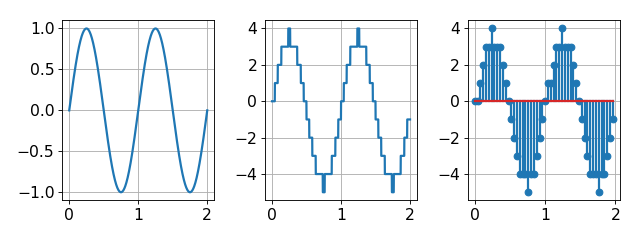

In [3]:
x = np.linspace(0.0, 2.0, num=1000)
y = np.sin(2.0*np.pi*1.0*x)
fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True)
ax[0].plot(x, y)
ax[1].plot(x, np.floor(y//0.249))
ax[2].stem(x[::20], np.floor(y[::20]//0.249));

### Funciones típicas

Impulso unitario:
$$
\delta[n] = \begin{cases} 1 & n=0\\ 0 & n \neq 0 \end{cases}
$$
Escalo unitario:
$$
u[n] = \sum_{k=0}^\infty \delta[n-k] = \begin{cases} 1 & n\geq 0\\ 0 & n < 0 \end{cases} 
$$
Propiedad: $\delta[n] = u[n] - u[n-1]$

Función exponencial real:
$$
y[n] = C e^{an}
$$

Función exponencial compleja:
$$
y[n] = e^{jn\omega} = \Re [e^{jn\omega}] + j \Im[e^{jn\omega}]  = \cos(n\omega) + j \sin (n\omega)
$$

Función exponencial compleja general:
$$
y[n] = |C|e^{a n + j\omega n + j\phi} = |C|e^{a n} [\cos(\omega n + \phi) + j\sin(\omega n + \phi)]
$$
Función Gaussiana
$$
y[n] = e^{- a (n-n_0)^2}, a> 0
$$

<IPython.core.display.Javascript object>


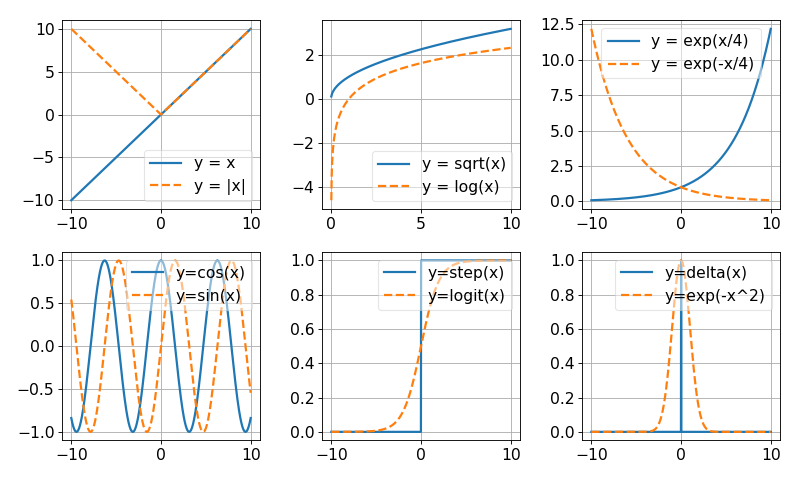

In [4]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(2, 3, figsize=(10, 6), tight_layout=True)
ax[0, 0].plot(x, x, label='y = x');  
ax[0, 0].plot(x, np.absolute(x), label='y = |x|', linestyle='--');  ax[0, 0].legend()
ax[0, 1].plot(x[x>0], np.sqrt(x[x>0]), label='y = sqrt(x)'); 
ax[0, 1].plot(x[x>0], np.log(x[x>0]), label='y = log(x)', linestyle='--');  ax[0, 1].legend();
ax[0, 2].plot(x, np.exp(0.25*x), label='y = exp(x/4)');
ax[0, 2].plot(x, np.exp(-0.25*x), label='y = exp(-x/4)', linestyle='--');  ax[0, 2].legend(); 
ax[1, 0].plot(x, np.cos(x), label='y=cos(x)')
ax[1, 0].plot(x, np.sin(x), label='y=sin(x)', linestyle='--'); ax[1, 0].legend(loc=1)
ax[1, 1].plot(x, np.heaviside(x, 0), label='y=step(x)'); 
ax[1, 1].plot(x, 1.0/(1.0+np.exp(-x)), label='y=logit(x)', linestyle='--'); ax[1, 1].legend(loc=1)
ax[1, 2].plot(x, scipy.signal.unit_impulse(len(x), 'mid'), label='y=delta(x)');
ax[1, 2].plot(x, np.exp(-0.5*x**2), label='y=exp(-x^2)', linestyle='--'); ax[1, 2].legend(loc=1);

<IPython.core.display.Javascript object>


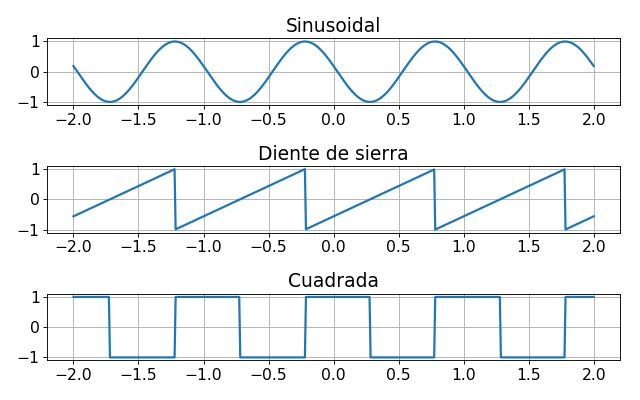

In [5]:
x = np.linspace(-2, 2, num=500)
fig, ax = plt.subplots(3, 1, figsize=(8, 5), tight_layout=True)
line0, = ax[0].plot(x, np.cos(2.0*np.pi*x)); ax[0].set_title('Sinusoidal')
line1, = ax[1].plot(x, scipy.signal.sawtooth(2.0*np.pi*x));  ax[1].set_title('Diente de sierra')
line2, = ax[2].plot(x, scipy.signal.square(x));  ax[2].set_title('Cuadrada');

def update(k = 1): 
    arg = 2.0*np.pi*(x - k*0.01)
    line0.set_ydata(np.cos(arg))
    line1.set_ydata(scipy.signal.sawtooth(arg))
    line2.set_ydata(scipy.signal.square(arg))
anim = animation.FuncAnimation(fig, update, frames=100, interval=20, blit=True)

<IPython.core.display.Javascript object>


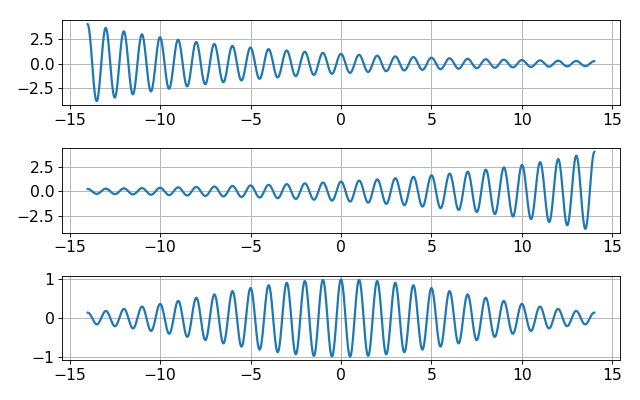

In [6]:
x = np.linspace(-14, 14, num=1000)
fig, ax = plt.subplots(3, 1, figsize=(8, 5), tight_layout=True)
ax[0].plot(x, np.exp(-0.1*x)*np.cos(2.0*np.pi*x));
ax[1].plot(x, np.exp(0.1*x)*np.cos(2.0*np.pi*x));
ax[2].plot(x, np.exp(-0.01*x**2)*np.cos(2.0*np.pi*x));

### Algunas propiedades de las funciones

- Función par o simétrica: 
$$f(x) = f(-x) $$
- Función inpar o antisimétrica: 
$$f(x) = -f(-x) $$
- Función periódica: 
$$\exists ~ T ~\text{tal que}~ f(x) = f(x+T) $$
- Función lineal (adición vectorial y multiplicación escalar): 
$$f(ax + by) = a f(x) + b f(y),$$
con $a$, $b$ coeficientes escalares 


<IPython.core.display.Javascript object>


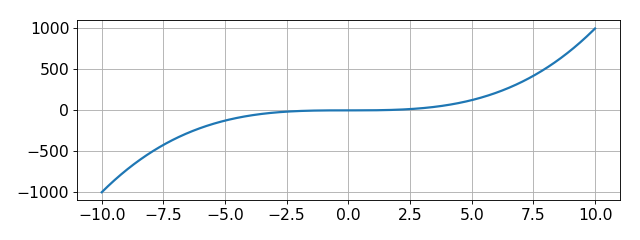

In [7]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(figsize=(8, 3), dpi=80, tight_layout=True)
ax.plot(x, -(-x)**3, label='y = x');  

<IPython.core.display.Javascript object>


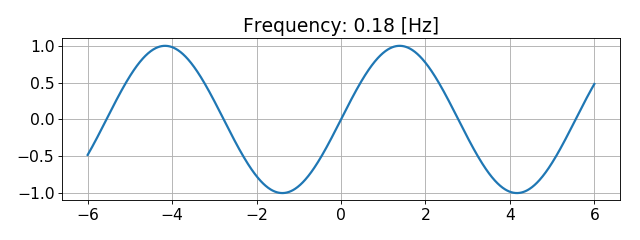

In [8]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=80, tight_layout=True)
t = np.linspace(-6, 6, num=1000)
x = np.sin(2*np.pi*1*t)
line, = ax.plot(t, x)
def update(k = 1): 
    line.set_ydata(np.sin(2*np.pi*0.01*k*t));
    ax.set_title("Frequency: %0.2f [Hz]" %(0.01*k))
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True) 

### Propiedades de las señales

- Siempre trabajaremos con señales que dentro de un rango de interés observado son **acotadas** en energía, potencia y/o en ancho de banda dentro. 
    - Es decir son señales finitas (no divergen ni se vuelven singulares)

- El rango en que una señal varía se conoce como su **rango dinámico**

- La **energía** de una señal mide su "tamaño" o el "espacio que ocupa". Para una señal analógica y discreta, respectivamente
$$
E_s = \int_{-\infty}^\infty |s(t)|^2 \,dt  \qquad E_s = \sum_{n=-\infty}^\infty |s[n]|^2 
$$
    - Una señal acotada en energía debe cumplir $E_s < \infty$

- La **potencia** promedio de una señal se define como su energía por unidad de tiempo
$$
P_s = \lim_{T\to \infty} \frac{1}{2T} \int_{- T}^{T} |s(t)|^2 \,dt  \qquad P_s = \lim_{N\to \infty} \frac{1}{2N+1} \sum_{n = - N}^{N} |s[n]|^2 
$$
    - Una señal acotada en potencia debe cumplir $P_s < \infty$
    - Una señal de energía finita tiene potencia cero
    - Una señal de potencia finita tiene duración infinita

- El **ancho de banda** de una señal mide su tasa de cambio o velocidad
    - Una señal acotada en **ancho de banda** debe tener transiciones suaves

¿Cual es la energía de esta señal?
$$
s(t) = \begin{cases} 0 & t < 0 \\ 2e^{-t/2} & t \geq 0\end{cases}
$$

<IPython.core.display.Javascript object>


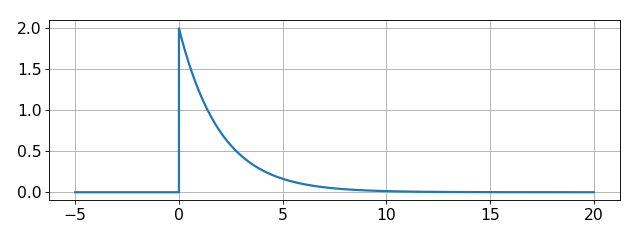

4.0020003250765726


In [9]:
dt=0.001; x = np.arange(-5, 20, step=dt)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
fig, ax = plt.subplots(figsize=(8, 3), dpi=80, tight_layout=True)
ax.plot(x, y)
print((y**2).sum()*dt);

### Transformaciones simples 
- Traslación y escalamiento de la variable independiente

<IPython.core.display.Javascript object>


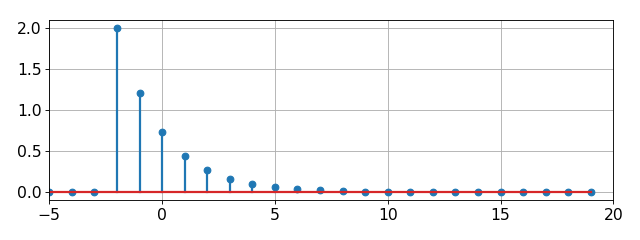

interactive(children=(IntSlider(value=0, continuous_update=False, description='Translation', layout=Layout(hei…

In [10]:
x = np.arange(-20, 20, step=1)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
fig, ax = plt.subplots(figsize=(8, 3), dpi=80, tight_layout=True)
_,line,_ = ax.stem(x, y)
def update(m=0):
    y_translation = np.roll(y, m)
    ax.cla(); ax.stem(x, y_translation); ax.set_xlim(-5, 20)
interact(update, m=IntSlider_nice(description="Translation", value=0, min=-10, max=10));

<IPython.core.display.Javascript object>


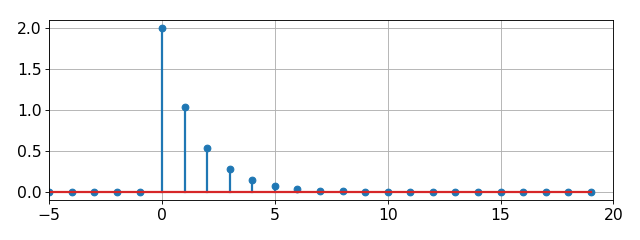

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Translation', layout=Layout…

In [11]:
x = np.arange(-20, 20, step=1)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
fig, ax = plt.subplots(figsize=(8, 3), dpi=80, tight_layout=True)
_,line,_ = ax.stem(x, y)
def update(m=0):
    y[x>=0] = 2*np.exp(-m*x[x>=0]/2)
    ax.cla(); ax.stem(x, y); ax.set_xlim(-5, 20)
interact(update, m=FloatSlider_nice(description="Translation", value=1, min=0.1, max=2));

## Clasificación según características de la señal

- **Señal determinista:** Puede describirse completamente por una ecuación matemática
    - Se puede subclasificar como periódica o aperiódica

<IPython.core.display.Javascript object>


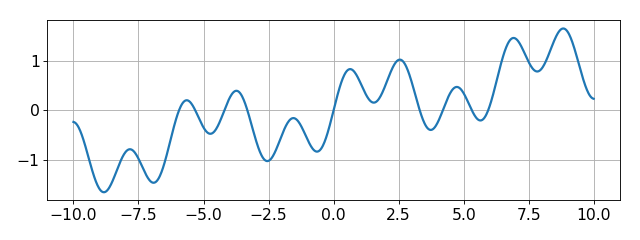

In [12]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
ax.plot(x, np.cos(x)*np.sin(2*x) + 0.1*x);  

- **Señal estocástica:** Se describe probabilisticamente, es decir en términos de su densidad de probabilidad.
    - Ejemplo: $z \in \mathbb{R}^N$ se distribuye normal con media $\mu \in \mathbb{R}^N$ y covarianza $\Sigma \in \mathbb{R}^{N\times N}$
$$ 
z \sim \mathcal{N}(\mu, \Sigma) ~~\vee~~ p(z) = \mathcal{N}(\mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left(-0.5 (z-  \mu)^T \Sigma^{-1} (z-  \mu) \right)
$$
    - Se puede subclasificar como estacionaria o no estacionaria
    - Formalmente se definen como **procesos aleatorios**

<IPython.core.display.Javascript object>


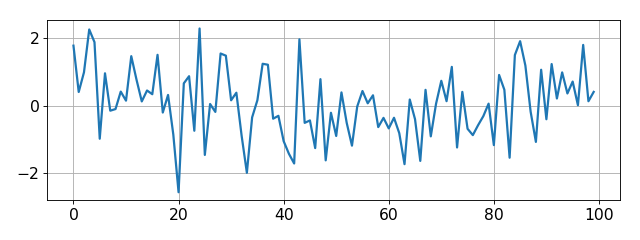

In [13]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
np.random.seed(0)
ax.plot(np.random.multivariate_normal(np.zeros(100), np.eye(100)));  

### Variable y proceso aleatorio

**Variable aleatoria**: Variable cuyos valores posibles son resultados de un fenomeno aleatorio 
- Se describe en términos de su función de densidad de probabilidad (fdp) o distribución 
- Los valores observados a partir de la V.A. se llaman **realizaciones**
- Por lo general asumimos que las realizaciones son **iid**: independientes e identicamente distribuidas
- Usualmente se denota como $X$ y sus realizaciones como $\{x_1, x_2, \ldots, x_N\}$

**Proceso aleatorio**: Colección de V.As indexada en el tiempo
- Una realización del P.A corresponde a una serie de tiempo
- Una conjunto de realizaciones se denomina ensamble

### Distribuciones de probabilidad y momentos estadísticos 

Una distribución se describe a través de sus momentos estadísticos. Para una variable aleatoria X su momento de orden k es
$$
\mu_k = \mathbb{E} \left[X^k\right]
$$
y su momento central de orden k
$$
\hat \mu_k =\mathbb{E} \left[(X - \mathbb{E}[X])^k\right]
$$
donde la esperanza se define como
$$
\mathbb{E}[X] = \sum_n x_n p(x_n)
$$
y la media muestreal es
$$
\langle X \rangle = \frac{1}{N} \sum_{n=1}^N x_n
$$

Los momentos estadísticos más usados son la 
- Media ($\mu$): $\mu_1$ 
- Varianza ($\sigma^2$): $\hat \mu_2$ 
- Simetría: $\frac{\hat \mu_3 }{\sqrt{\hat \mu_2^3}}$
- Kurtosis: $\frac{\hat \mu_4 }{ \hat \mu_2^2}$


<img src="img/moments.png">





- Las señales **deterministas** se generan por un algoritmo o sistema no probabilístico. 
   - Son reproducibles y predecibles: conocemos su valor
- Las señales **estocásticas** se modelan como una variable aleatoria: no conocemos su valor. 
    - Sin embargo, podemos conocer el tipo y parámetros de su distribución.

<IPython.core.display.Javascript object>


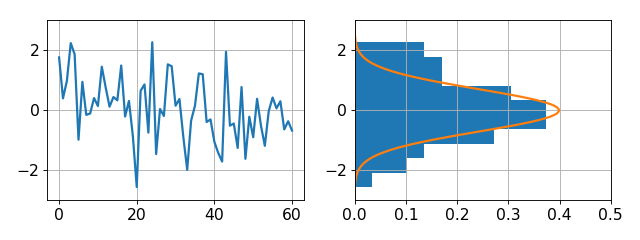

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)
x = np.linspace(-3, 3, num=100); 
np.random.seed(0)
data = np.random.randn(100)
def update(N = 1):    
    ax[0].cla(); ax[1].cla(); ax[0].set_ylim(-3, 3);
    ax[1].set_ylim(-3, 3); ax[1].set_xlim(0, 0.5);
    ax[0].plot(data[:N]); 
    ax[1].hist(data[:N], bins=10, density=True, orientation=u'horizontal'); 
    ax[1].plot(np.exp(-x**2)/np.sqrt(2.0*np.pi), x); 
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

<IPython.core.display.Javascript object>


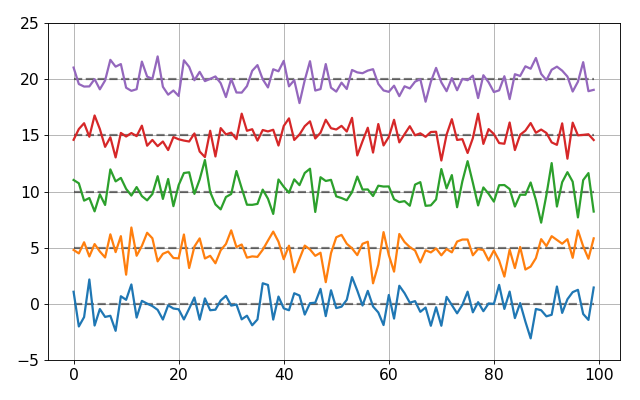

interactive(children=(IntSlider(value=0, continuous_update=False, description='Random seed', layout=Layout(hei…

In [15]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
def update(seed):
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 25)
    for k in range(0, 25, 5): 
        ax.plot(100*[k], 'k--', alpha=0.5)
        data = k + np.random.randn(100);        
        #data = k + np.random.multivariate_normal(np.zeros(100), np.eye(100))
        ax.plot(data); 
interact(update, seed=IntSlider_nice(description='Random seed'));

### Proceso estacionario
- Un proceso aleatorio es una colección de variables aleatorias indexadas 
$$X^t = {X_1, X_2, X_3, \ldots, X_T}$$
- Una realización del P.A. es una serie de tiempo 
$$X^t \sim \{x_t\}_{t=1,\ldots,T} = {x_1, x_2, x_3, \ldots, x_T}$$
- Un **proceso estacionario** es aquel donde sus momentos no varían con el tiempo, *e.g.*
$$
\mathbb{E}[X_1] = \mathbb{E}[X_2] = \ldots = \mathbb{E}[X_T] 
$$
- Un **proceso ergódico** es aquel donde los momentos se pueden deducir a partir de una realización (suficientemente larga) del P.A. 
    - Esto es útil pues muchas veces observamos sólo una realización
    - Los promedios muestreales del ensamble equivalen a promedios muestreales temporales

$$
\langle x_t \rangle = \mathbb{E}[X_k] ~~\forall k
$$

<img src="img/stationary-and-ergodic.png">

## Ruido en las señales

- En la práctica no solemos observar señales puramente deterministas
- Esto se debe a la presencia del **ruido**
- El ruido es una señal puramente estocástica
- El ruido es una corrupción indeseable que modifica la señal de interés
- Un modelo clásico consiste en asumir una corrupción aditiva
$$
y[k] = x[k] + n[k],
$$
donde $y$ es la señal observada, $x$ es la señal de interés y $n$ es una señal de ruido

<IPython.core.display.Javascript object>


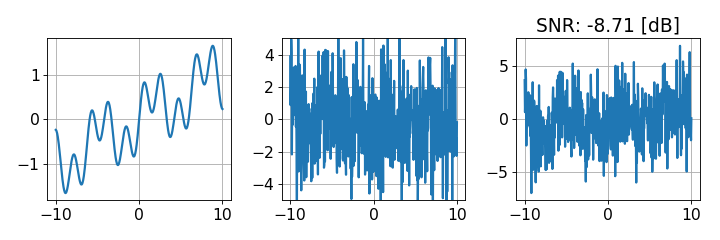

interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='Gaussian noise $\\sigma$',…

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), dpi=80, tight_layout=True)
t = np.linspace(-10, 10, num=500)
x = np.cos(t)*np.sin(2*t) + 0.1*t
np.random.seed(0)
n = np.random.randn(len(t))
ax[0].plot(t, x); 
def update(s = 1.0):
    ax[1].cla(); ax[1].plot(t, n*s); ax[1].set_ylim(-5, 5)
    ax[2].cla(); ax[2].plot(t, x+n*s) 
    ax[2].set_title("SNR: %0.2f [dB]" %(10*np.log10(np.sum(x**2)/np.sum((n*s)**2))))
interact(update, s=FloatSlider_nice(description="Gaussian noise $\sigma$", min=0.01, max=3.0));

- Podemos cuantificar el "nivel de ruido" o la claridad de la señal observado en términos de la **razón señal a ruido** (SNR)
- La SNR se define como la razón entre la energía de la señal y la energía del ruido
- La SNR se mide en decibeles [dB]

$$
\text{SNR} = 10 \log_{10} \frac{E_x}{E_n}
$$

### Tipos de ruido
Podemos clasificar el ruido según
-  la distribución que sigue, *e.g.* ruido Gaussiano, ruido Uniforme
-  la dependencia temporal entre sus realizaciones (características espectrales), *e.g.* ruido blanco, ruido rojo


<IPython.core.display.Javascript object>


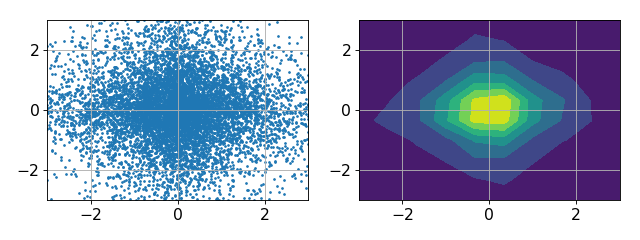

interactive(children=(IntSlider(value=0, continuous_update=False, description='log Number of realizations', la…

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=80, tight_layout=True)
def update(N = 1.0, seed=0):
    np.random.seed(seed)
    #data = np.random.uniform(low=-2, high=2, size=(10**N, 2))
    #data = np.random.normal(0, 1, size=(10**N, 2))
    data = np.random.laplace(0, 1, size=(10**N, 2))
    ax[0].cla(); ax[1].cla();
    ax[0].set_xlim([-3, 3]); ax[0].set_ylim([-3, 3])
    ax[0].scatter(data[:, 0], data[:, 1], s=2) 
    counts, xbins, ybins = np.histogram2d(data[:, 1], data[:, 0], bins=10, range=[[-3 ,3], [-3, 3]])
    ax[1].contourf(counts, extent=[-3, 3, -3, 3])
interact(update, N=IntSlider_nice(description="log Number of realizations", min=0, max=4), 
         seed=IntSlider_nice(description='Random seed'));

<IPython.core.display.Javascript object>


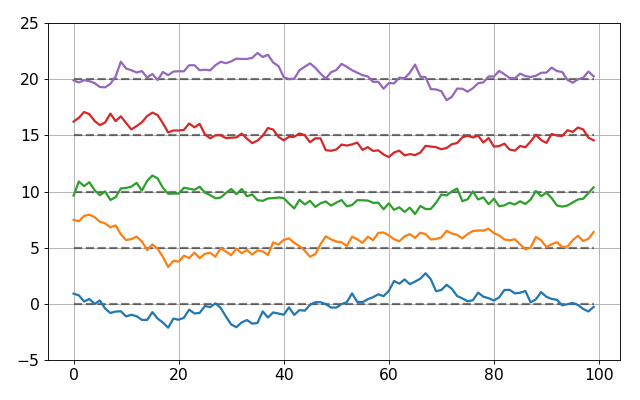

interactive(children=(IntSlider(value=0, continuous_update=False, description='Random seed', layout=Layout(hei…

In [21]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
def update(seed, tau):
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 25)
    for k in range(0, 25, 5): 
        ax.plot(100*[k], 'k--', alpha=0.5)
        dt = np.repeat(np.reshape(np.arange(100), (1, -1)), 100, axis=0)
        S = np.exp(-np.absolute(dt - dt.T)/tau)
        data = k + np.random.multivariate_normal(np.zeros(100), S)
        ax.plot(data); 
interact(update, tau=FloatSlider_nice(description="Time decay", min=0.1, max=10),
         seed=IntSlider_nice(description='Random seed'));

### Reducción de ruido simple
Sea una señal periódica con ruido es aditivo, estacionario y de media cero. En este caso podemos reducir el ruido haciendo promedios de la señal de interés.

$$
\langle y \rangle = \langle x + n \rangle = \langle x  \rangle + \langle  n \rangle= \langle x \rangle
$$

<IPython.core.display.Javascript object>


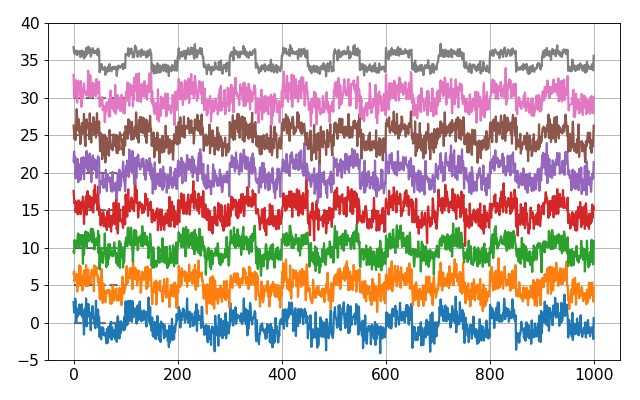

interactive(children=(IntSlider(value=0, continuous_update=False, description='Random seed', layout=Layout(hei…

In [22]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
x = np.linspace(0, 10, num=1000)
def update(seed, s):
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 40)
    data_avg = 0.0
    for k in range(0, 35, 5): 
        ax.plot(100*[k], 'k--', alpha=0.5)
        data = scipy.signal.square(2.0*np.pi*x) + s*np.random.randn(1000);        
        data_avg += data
        #data = k + np.random.multivariate_normal(np.zeros(100), np.eye(100))
        ax.plot(k + data); 
    ax.plot(k + 5+ data_avg/7); 
interact(update, seed=IntSlider_nice(description='Random seed'), 
         s=FloatSlider_nice(description='Noise $\sigma$', min=0.1, max=1.5, value=1.0));

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05
tmax, n = 100, 10000
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp
t = np.linspace(0, tmax, n)
f = scipy.integrate.odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
line = ax.plot(x, y, z, linewidth=0.5); 
"""
ax.set_xlim([np.amin(x), np.amax(x)]); ax.set_ylim([np.amin(y), np.amax(y)]); ax.set_zlim([np.amin(z), np.amax(z)]);
def update(k=0): 
    line[0].set_data(f.T); 
    line[0].set_3d_properties(f.T)
    return line
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True) 
"""

## Apéndice: Procesamiento de señales de audio con python

In [ ]:
sample_rate = 44100; time = np.arange(0, 3, step=1.0/sample_rate)
data = np.sin(2*np.pi*220*time)# *(1.0 + np.cos(2*np.pi*4*time))*0.5 #+ 0.05*np.random.randn(len(time))
fig, ax = plt.subplots(2, figsize=(8, 6), dpi=80, tight_layout=True)
ax[0].plot(time, data);
freq, ttime, Sxx = scipy.signal.spectrogram(data, fs=sample_rate, window=('tukey', 0.25), 
                                            nperseg=256, noverlap=None, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
ax[1].pcolormesh(ttime, freq, np.log10(Sxx + 1e-5), cmap=plt.cm.magma); 
Audio(data, rate=sample_rate)

In [ ]:
data, sample_rate = sf.read("data/123.ogg")
time = np.linspace(0.0, len(data)/sample_rate, num=len(data))
fig, ax = plt.subplots(2, figsize=(8, 6), dpi=80, tight_layout=True)
ax[0].plot(time, data);
freq, ttime, Sxx = scipy.signal.spectrogram(data, fs=sample_rate, window=('tukey', 0.25), 
                                            nperseg=256, noverlap=None, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
ax[1].pcolormesh(ttime, freq, np.log10(Sxx+1e-5), cmap=plt.cm.magma); ax[1].set_ylim([0.0, 5e+3]);
Audio(data, rate=sample_rate)

In [ ]:
b = np.zeros(shape=(sample_rate//2,))
b[0] = 1; b[-1] = 0.5; b[len(b)//2] = 0.5; b[len(b)//4] = 0.5;
data_filt = scipy.signal.lfilter(b, [1.0], np.hstack((data, np.zeros(shape=(sample_rate,)))))
Audio(data_filt, rate=sample_rate)

<a id='section11'></a>
# Muestreo y digitalización de señales

- Las señales físicas naturales son analógicas de tiempo continuo
- Para procesar señales con nuestro computador debemos discretizarlas y cuantizarlas
- Se llama conversor A/D a un dispositivo que realiza dicha transformación
- Se llama conversor D/A a un dispositivo que realiza la transformación inversa